# How pedestrians activity changed in time

In [1]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams.update({'font.size': 20})

In [2]:
from data import read_count

In [3]:
def read_merge(camera_location, feature, bins, xrange, tiled=True):
    df = pd.DataFrame()
    for y in range(2016, 2021):
        t = '-split6' if tiled else ''  
        df_y = read_count(f'data/{camera_location}-{y}{t}.csv')
        df_y = df_y[['date', feature]]
        df = df.append(df_y)
        
    df = df.reset_index() 
    
    m = df.loc[df['person'].idxmax()]
    print('Max. persons', m['person'], '\t', m['date'])
    person_mean = df.person.mean()
    
    #ax = df['person'].hist(bins=bins, range=xrange); 
    ax = df['person'].hist(bins=bins); 
    plt.axvline(x=df.person.mean(), color='red', linestyle='dotted', linewidth=2);
    ax.set_xlabel('Pedestrians on one image')
    ax.set_ylabel('Count')    
    ax.annotate(f'mean = {person_mean:.1f}', xy=(person_mean*1.1, ax.get_ylim()[1]*0.6))
    plt.savefig(f'figure/{camera_location}-count-{feature}.png')
    
    return df

Max. persons 80 	 2019-11-17 15:00:00


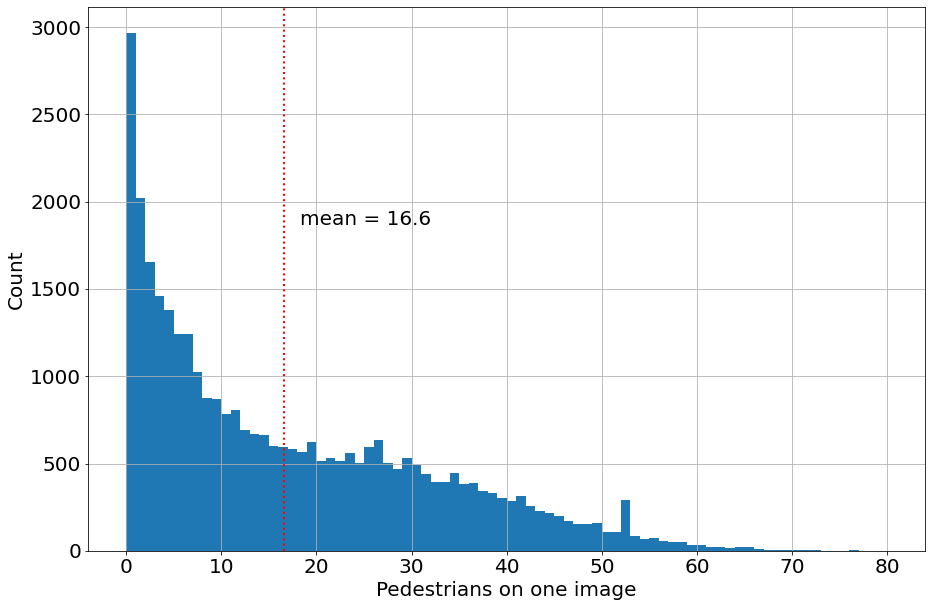

In [4]:
df_allsaints = read_merge('all_saints_square', 'person', bins=80, xrange=[0, 100])

Max. persons 58 	 2019-05-04 14:00:00


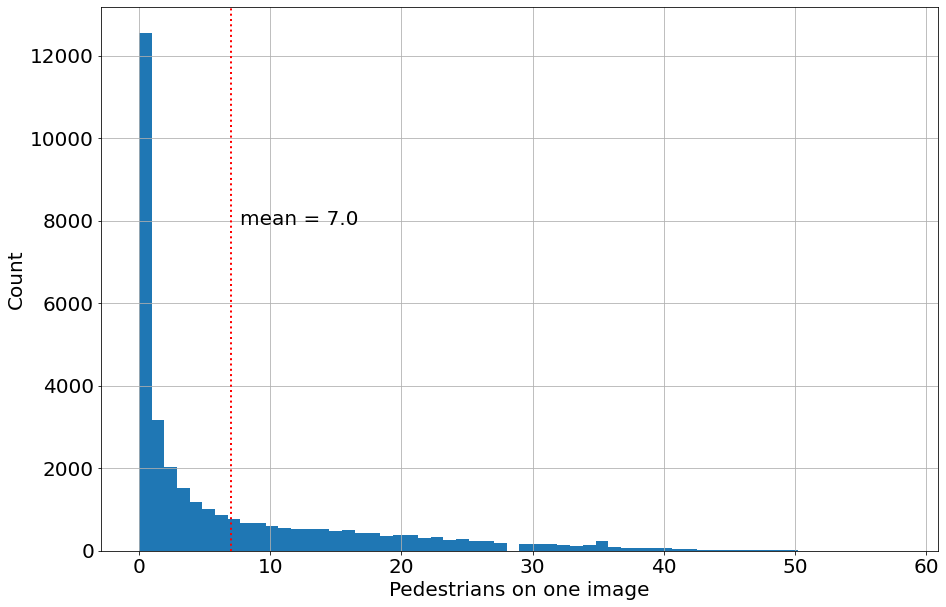

In [5]:
df_grodzka = read_merge('grodzka', 'person', bins=60, xrange=[-5, 30])

Max. persons 16 	 2019-03-24 16:00:00


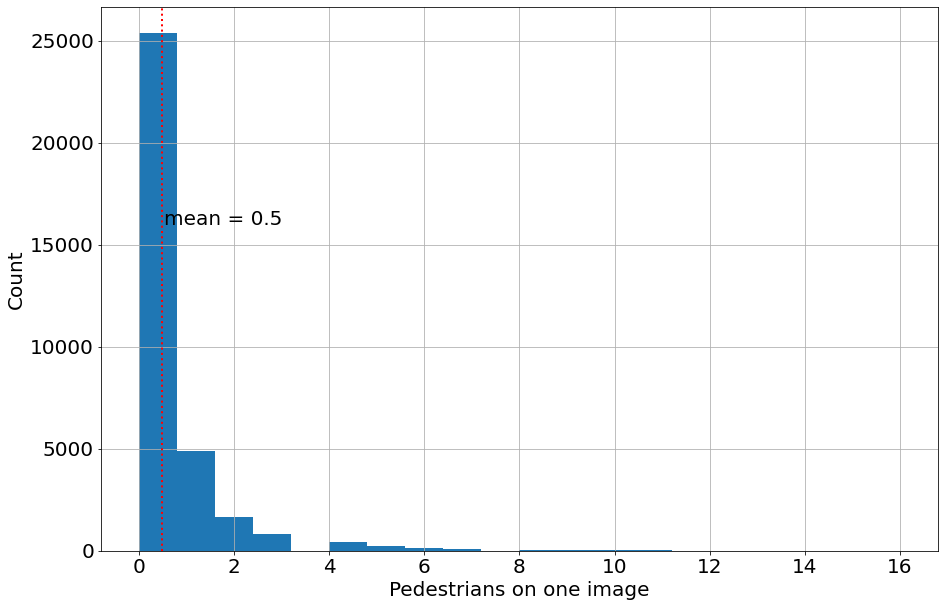

In [6]:
df_wawel = read_merge('wawel', 'person', bins=20, xrange=[-5, 9])

Max. persons 34 	 2019-08-13 16:00:00


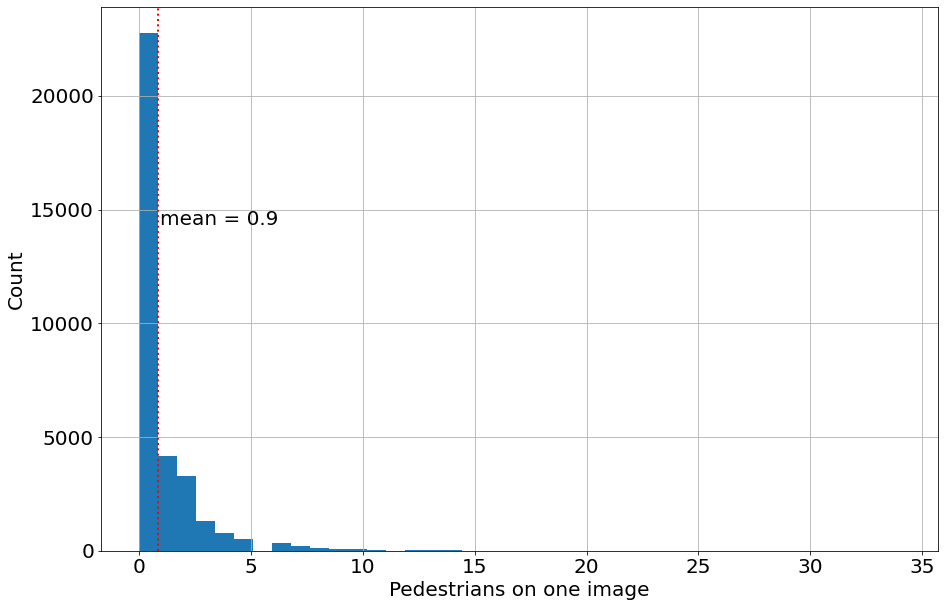

In [7]:
df_podgorze = read_merge('podgorze_market_square', 'person', bins=40, xrange=[-5,9])

## 1-hour data

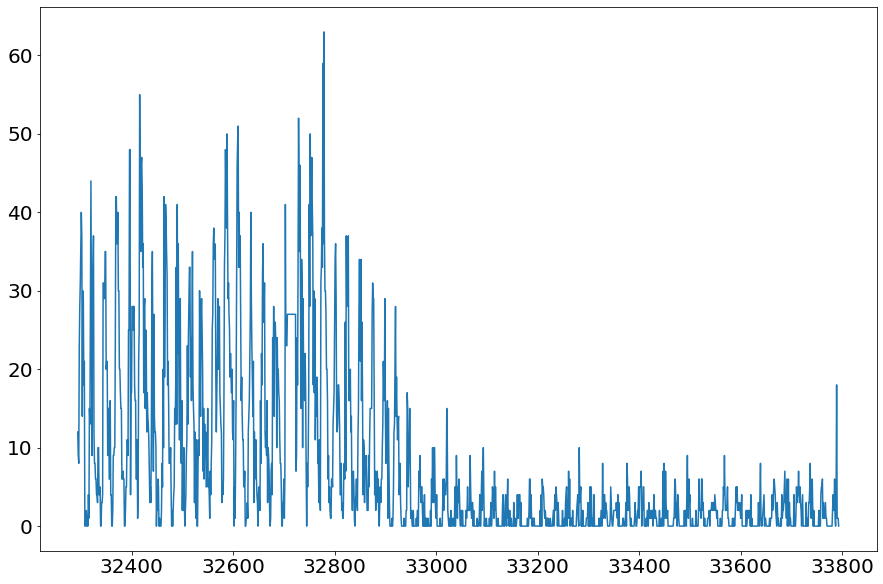

In [8]:
df_allsaints.person[-1500:].plot()

## Daily mean

In [9]:
def plot_day(df):
    df_out = df.resample('D', on='date')['person'].mean().reset_index()
    plt.plot(df_out.date, df_out.person)
    plt.xlabel('Time')
    plt.ylabel('Mean daily pedestrians from 1h time-lapse')
    
    return df_out

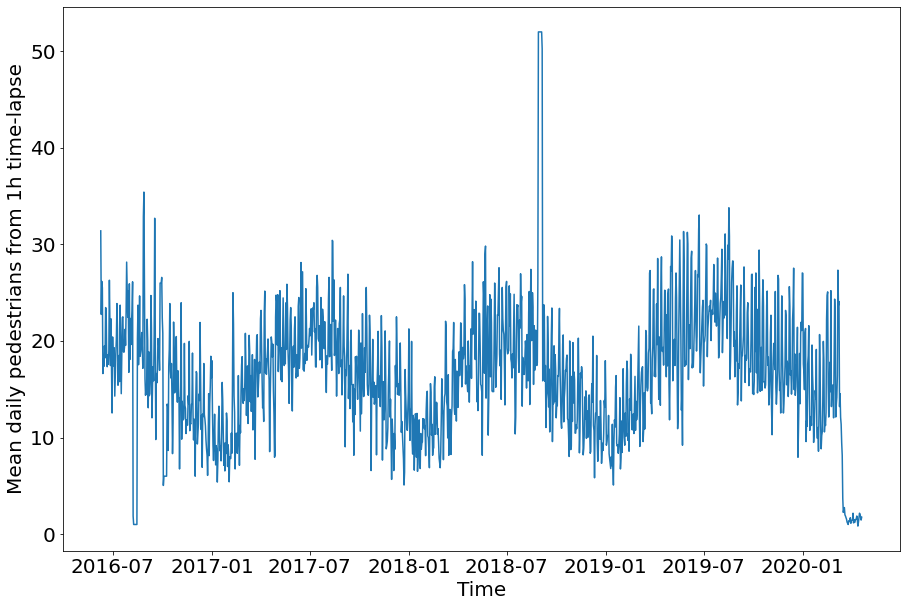

In [10]:
plot_day(df_allsaints);

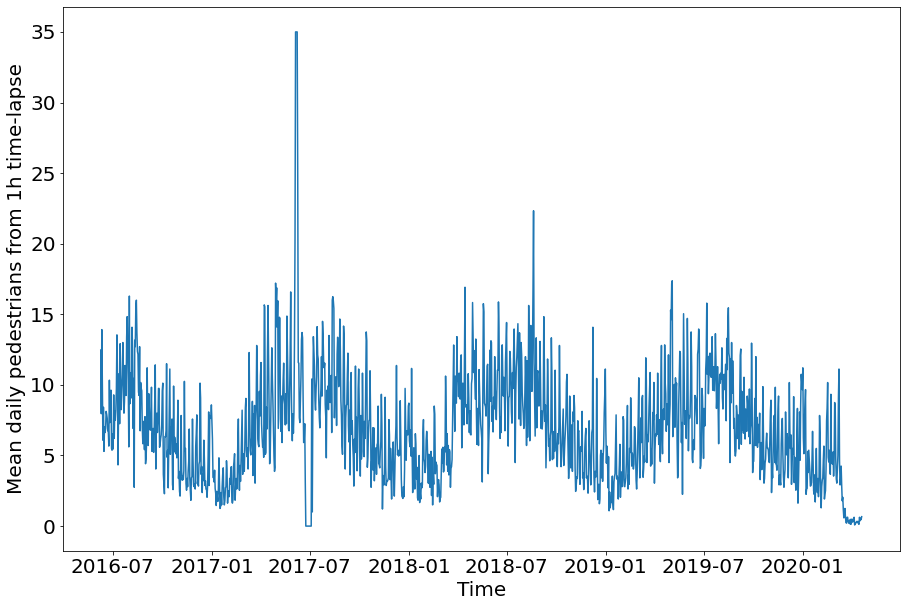

In [11]:
plot_day(df_grodzka);

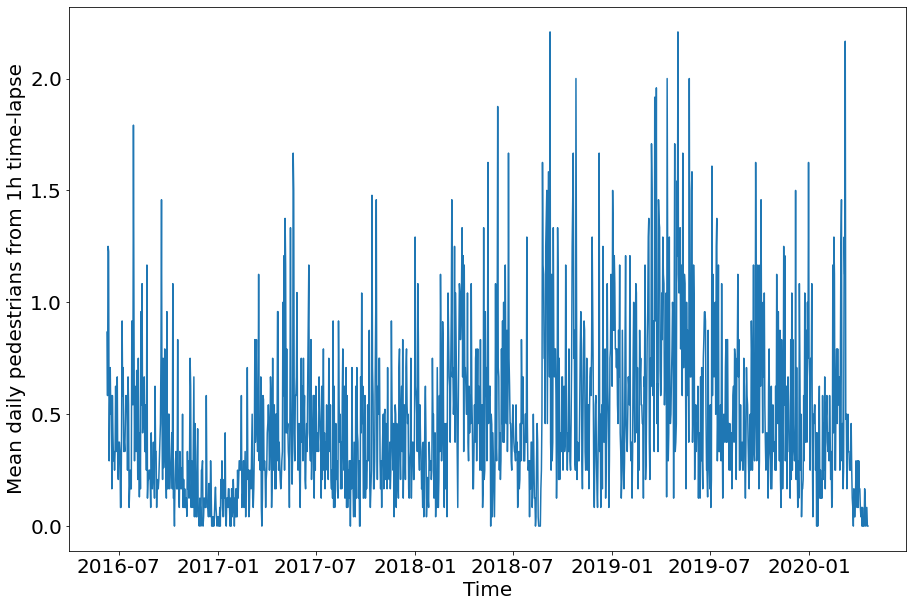

In [12]:
plot_day(df_wawel);

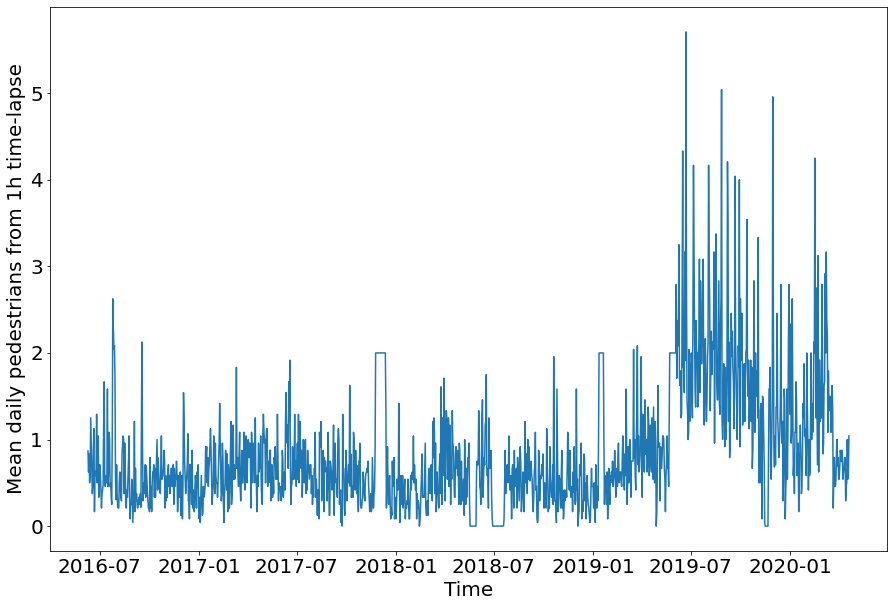

In [13]:
plot_day(df_podgorze);

## Daily sum

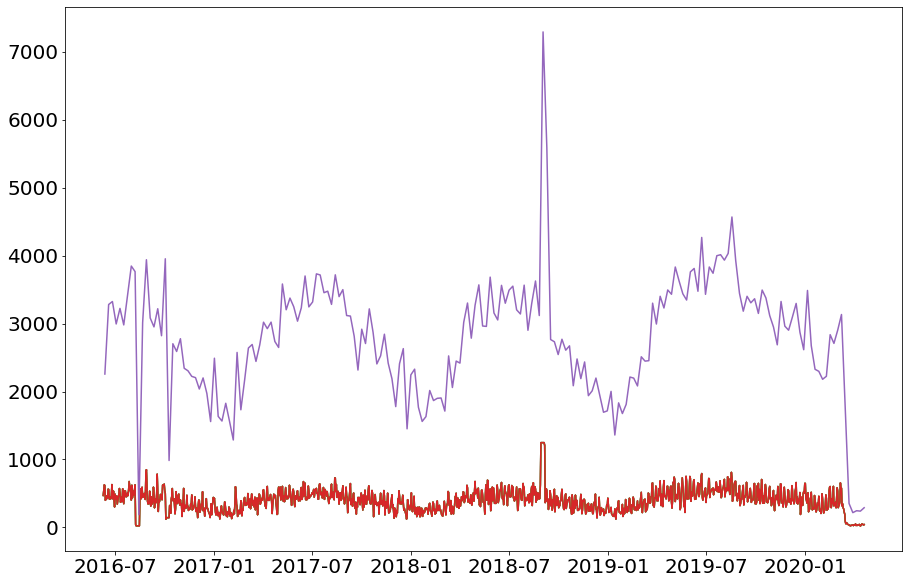

In [14]:
df1d = df_allsaints.resample('D', on='date')['person'].sum().reset_index()
plt.plot(df1d.date, df1d.person)
df1d = df_allsaints.resample('D', on='date')['person'].sum().reset_index()
plt.plot(df1d.date, df1d.person)
df1d = df_allsaints.resample('D', on='date')['person'].sum().reset_index()
plt.plot(df1d.date, df1d.person)
df1d = df_allsaints.resample('D', on='date')['person'].sum().reset_index()
plt.plot(df1d.date, df1d.person)
df2w = df_allsaints.resample('W', on='date')['person'].sum().reset_index()
plt.plot(df2w.date, df2w.person)

## Key dates - restrictions in Poland

In [15]:
rest1 = '2020-03-13'
rest2 = '2020-03-24'
rest3 = '2020-03-31'

## Resampled data

In [16]:
def plot_period(period='W'):    
    df_1 = df_allsaints.resample(period, on='date')['person'].mean().reset_index()
    df_2 = df_grodzka.resample(period, on='date')['person'].mean().reset_index()
    df_3 = df_wawel.resample(period, on='date')['person'].mean().reset_index()
    df_4 = df_podgorze.resample(period, on='date')['person'].mean().reset_index()
    plt.plot(df_1.date, df_1.person)
    plt.plot(df_2.date, df_2.person)
    plt.plot(df_3.date, df_3.person)
    plt.plot(df_4.date, df_4.person)
    
    plt.axvline(x=pd.to_datetime(rest1), color='red', linestyle='dotted', linewidth=2);
    plt.axvline(x=pd.to_datetime(rest2), color='red', linestyle='dotted', linewidth=2);
    plt.axvline(x=pd.to_datetime(rest3), color='red', linestyle='dotted', linewidth=2);
    
    return df_1

### Monthly mean

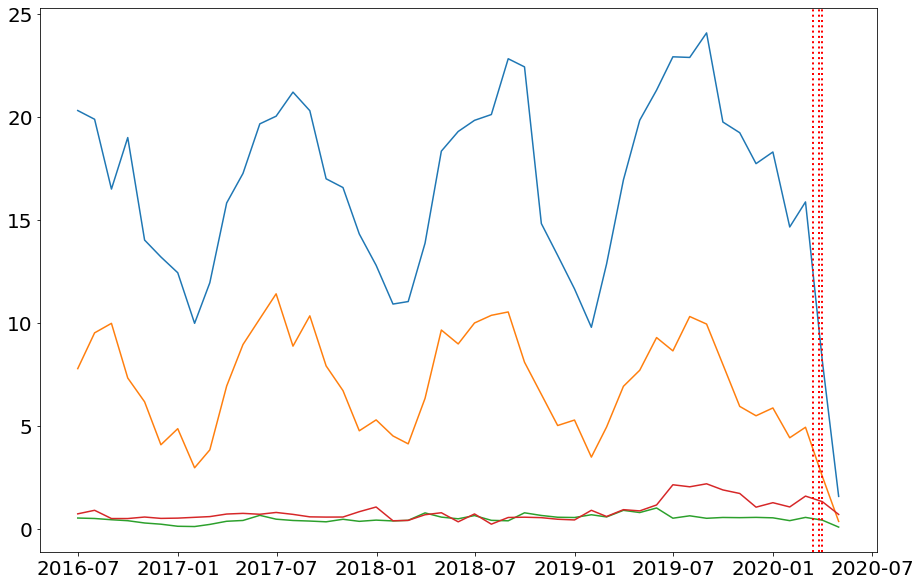

In [17]:
plot_period('M');

### Weekly mean

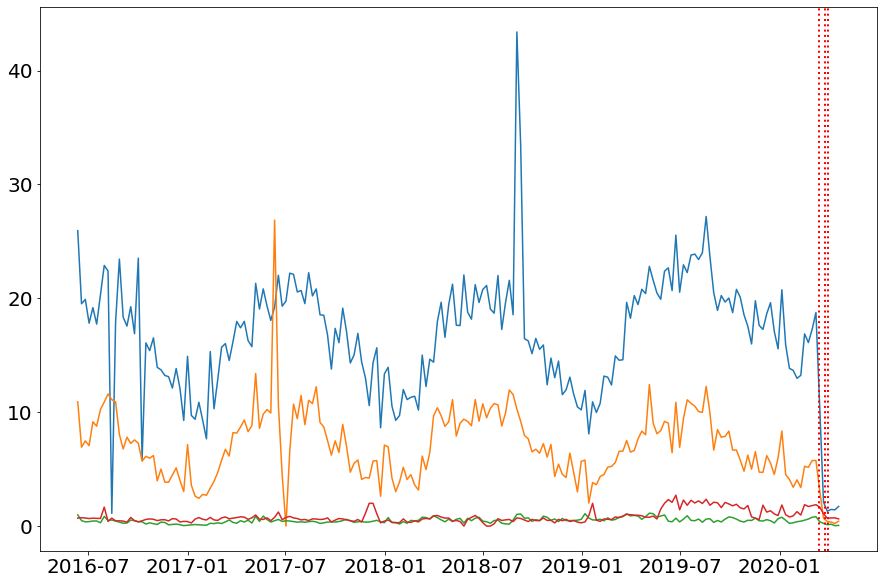

In [18]:
plot_period('W');

### Daily mean

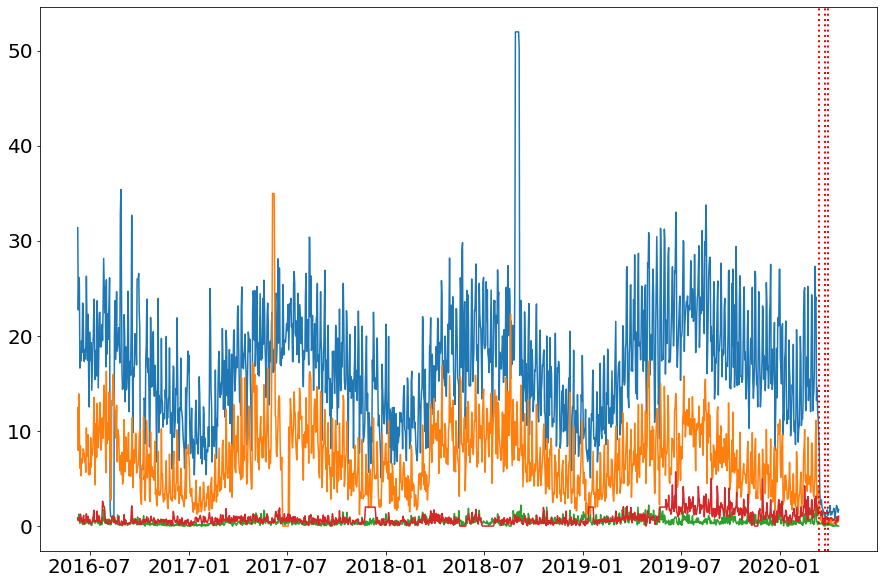

In [19]:
plot_period('D');

## Anomaly detection

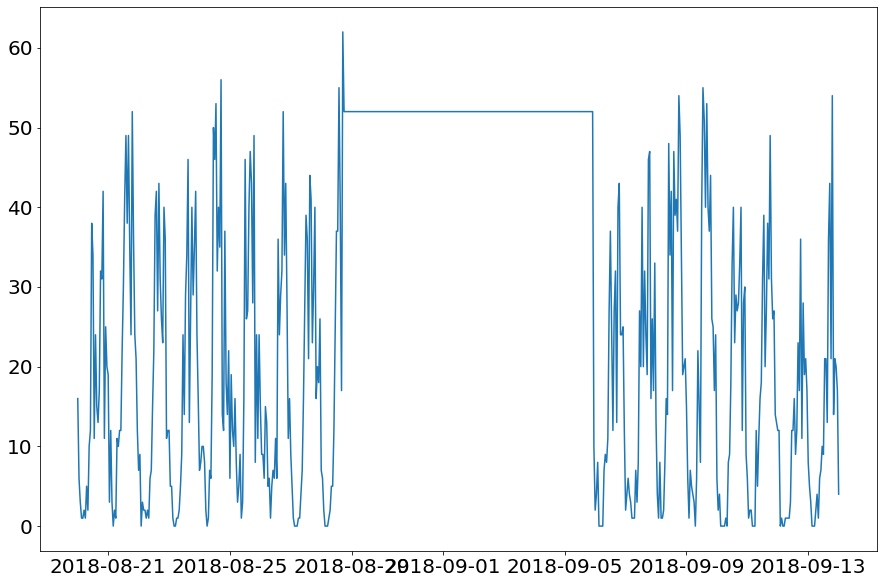

In [20]:
t = df_allsaints.iloc[19200:19800]
plt.plot(t.date, t.person);

the same image from 2018-08-28_19-00 to 2018-09-05_22-00  (9 days)

In [21]:
anomaly_start = '2018-08-28 19:00'
anomaly_end = '2018-09-05 22:00'
df_allsaints.shape

(33794, 3)

In [22]:
def exclude_anomaly(df, anomaly_start, anomaly_end):
    return df[(df['date'] < anomaly_start) | (df['date'] > anomaly_end)]

In [23]:
df_allsaints_2 = exclude_anomaly(df_allsaints, anomaly_start, anomaly_end)
df_allsaints_2.shape

(33598, 3)

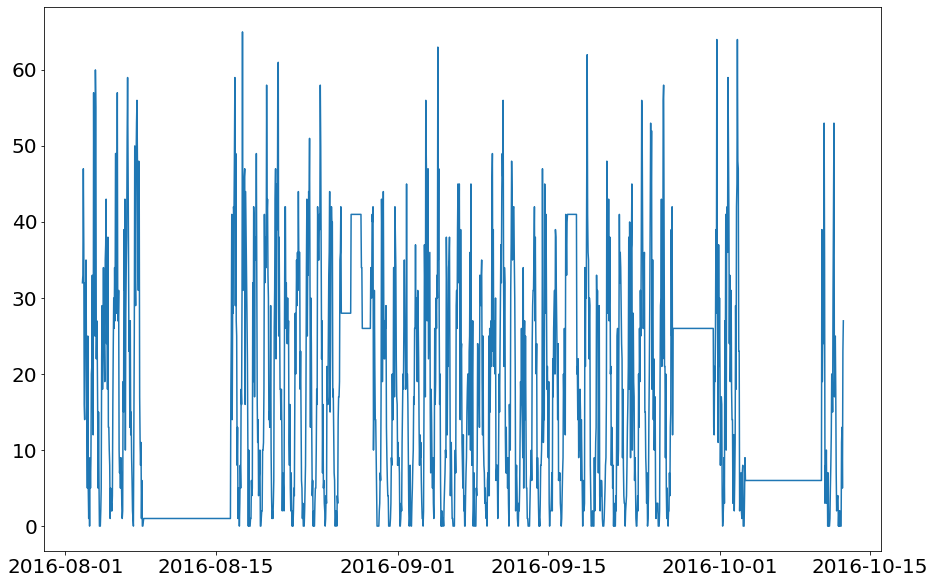

In [24]:
t = df_allsaints.iloc[1300:3000]
plt.plot(t.date, t.person);

In [25]:
df_allsaints_2 = exclude_anomaly(df_allsaints_2, '2016-08-05', '2016-10-13')
df_allsaints_2.shape

(31944, 3)

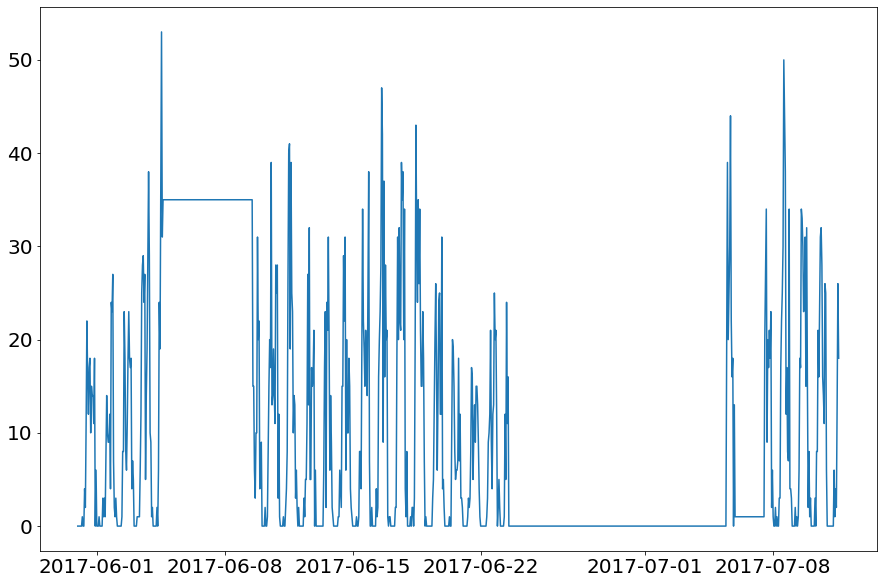

In [26]:
t = df_grodzka.iloc[8500:9500]
plt.plot(t.date, t.person);

Same image from 2017-06-04_16-00 to 2017-06-09_12-00  (6 days)  
Same image from 2017-06-23_14-00 to 2017-07-05_09-00  (13 days)

In [27]:
df_grodzka_2 = exclude_anomaly(df_grodzka, '2017-06-04 16:00', '2017-06-09 12:00')
df_grodzka_2.shape

(33664, 3)

In [28]:
df_grodzka_2 = exclude_anomaly(df_grodzka_2, '2017-06-23 14:00', '2017-07-05 09:00')
df_grodzka_2.shape

(33380, 3)

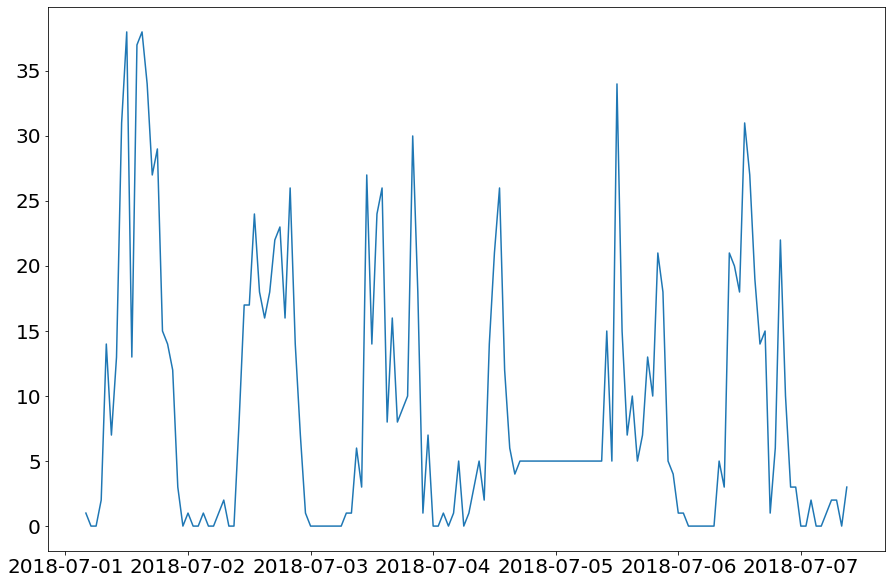

In [29]:
t = df_grodzka.iloc[18000:18150]
plt.plot(t.date, t.person);

In [30]:
df_grodzka_2 = exclude_anomaly(df_grodzka_2, '2017-06-23 14:00', '2017-07-05 09:00')
df_grodzka_2.shape

(33380, 3)

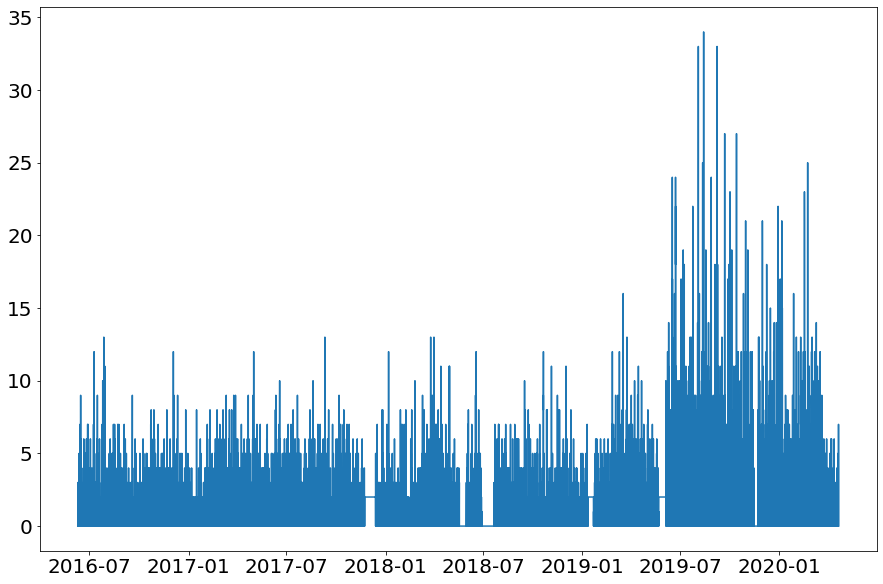

In [31]:
t = df_podgorze.iloc[:]
plt.plot(t.date, t.person);

#### Changed field of view in Podgorze webcam - we take just images from new camera

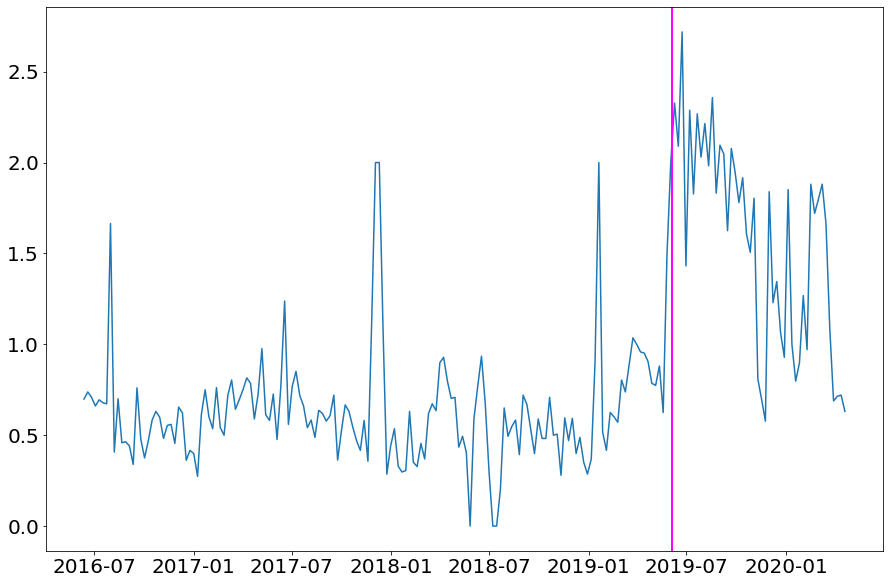

In [32]:
df_p = df_podgorze.resample("W", on='date')['person'].mean().reset_index()
plt.plot(df_p.date, df_p.person);
plt.axvline(x=pd.to_datetime('2019-06-04'), color='magenta', linestyle='solid', linewidth=2);

In [33]:
df_podgorze_2 = exclude_anomaly(df_podgorze, '2000-01-01', '2019-06-05')
df_podgorze_2.shape

(7670, 3)

## Divide timeseries into two periods (normal, covid)

In [34]:
def two_periods(df, day):
    return df[df['date'] < day], df[df['date'] >= day]

df_per1_allsaints, df_per2_allsaints = two_periods(df_allsaints_2, rest1)
print(df_per1_allsaints.shape, df_per2_allsaints.shape)
df_per1_grodzka, df_per2_grodzka = two_periods(df_grodzka_2, rest1)
df_per1_wawel, df_per2_wawel = two_periods(df_wawel, rest1)
df_per1_podgorze, df_per2_podgorze = two_periods(df_podgorze_2, rest1)

(31033, 3) (911, 3)


## Pedestrian activity change, 1h mean in two periods

In [35]:
per1_mean_allsaints = df_per1_allsaints.person.mean()
per2_mean_allsaints = df_per2_allsaints.person.mean()
per1_mean_grodzka = df_per1_grodzka.person.mean()
per2_mean_grodzka = df_per2_grodzka.person.mean()
per1_mean_wawel = df_per1_wawel.person.mean()
per2_mean_wawel = df_per2_wawel.person.mean()
per1_mean_podgorze = df_per1_podgorze.person.mean()
per2_mean_podgorze = df_per2_podgorze.person.mean()

In [36]:
def activity_change(webcam, per1, per2):
    print(webcam)
    print(f'Pedestrian mean: normal {per1:.2f}, covid {per2:.2f}')
    print(f'Activity change: {(per2 - per1) / (per1 + per2) * 100:.2f}%')

In [37]:
activity_change('All Saints', per1_mean_allsaints, per2_mean_allsaints)

All Saints
Pedestrian mean: normal 16.86, covid 2.04
Activity change: -78.41%


In [38]:
activity_change('Grodzka', per1_mean_grodzka, per2_mean_grodzka)

Grodzka
Pedestrian mean: normal 7.13, covid 0.57
Activity change: -85.32%


In [39]:
activity_change('Wawel', per1_mean_wawel, per2_mean_wawel)

Wawel
Pedestrian mean: normal 0.49, covid 0.14
Activity change: -54.64%


In [40]:
activity_change('Podgorze', per1_mean_podgorze, per2_mean_podgorze)

Podgorze
Pedestrian mean: normal 1.66, covid 0.82
Activity change: -33.82%


## Box plots

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html

In [41]:
def boxplot(df1, df2, name):
    p1 = df1.rename({'person':f'{name}'}, axis='columns')
    p2 = df2.rename({'person':f'{name} COVID'}, axis='columns')
    p1.drop('index', axis=1, inplace=True)
    p2.drop('index', axis=1, inplace=True)
    x = pd.merge(p1, p2, left_on='date', right_on='date', how='outer')
    x.boxplot();    

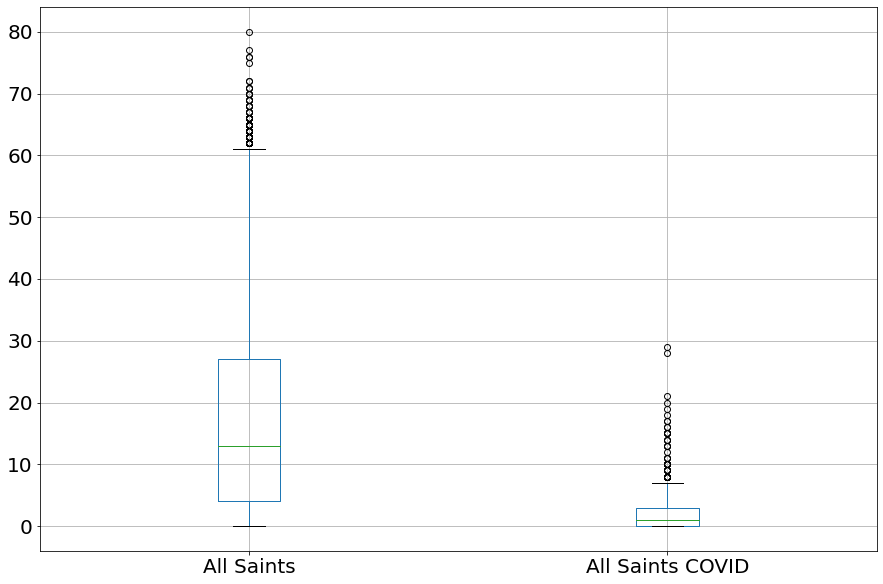

In [42]:
boxplot(df_per1_allsaints, df_per2_allsaints, 'All Saints')

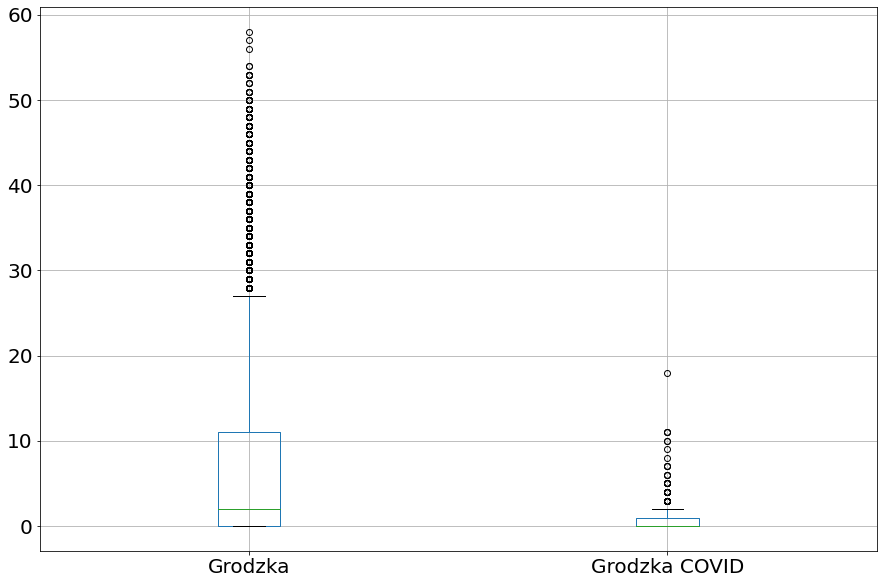

In [43]:
boxplot(df_per1_grodzka, df_per2_grodzka, 'Grodzka')

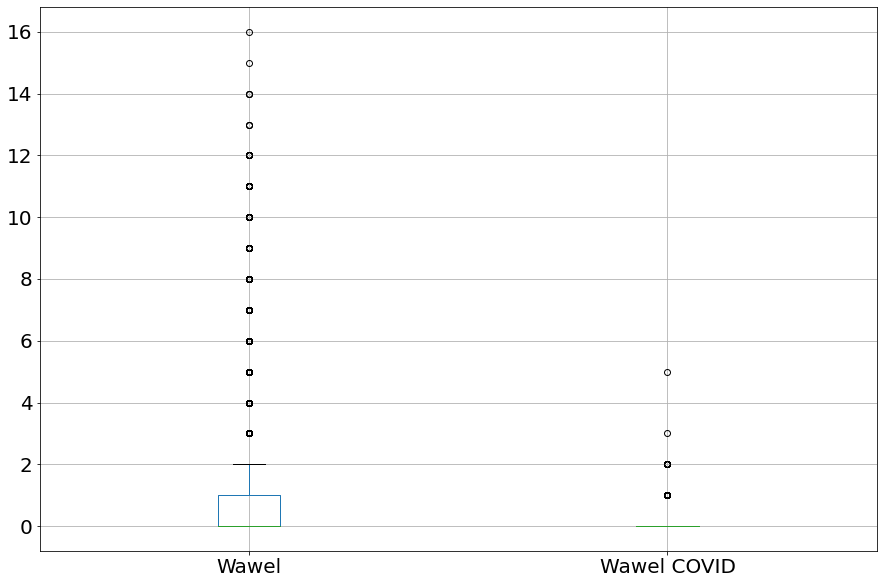

In [44]:
boxplot(df_per1_wawel, df_per2_wawel, 'Wawel')

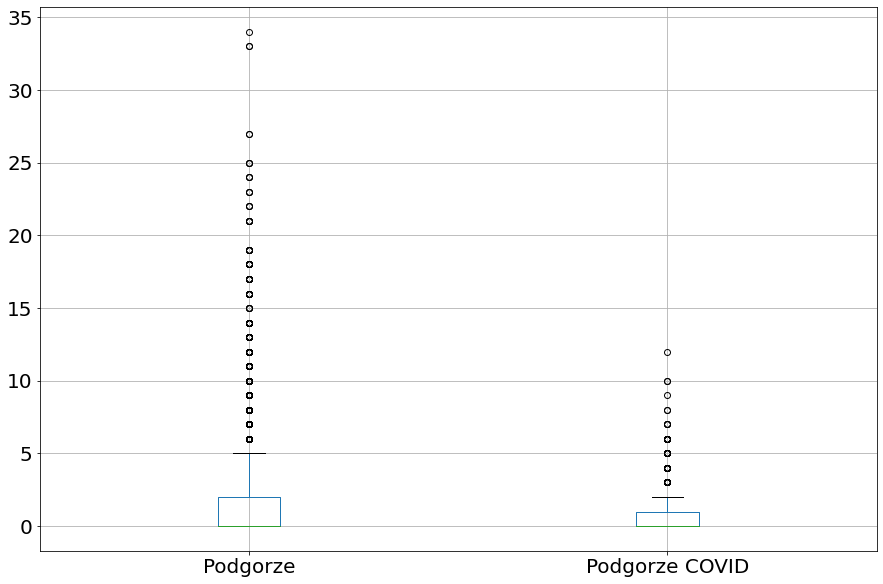

In [45]:
boxplot(df_per1_podgorze, df_per2_podgorze, 'Podgorze')

# Pedestrian activity in time

In [46]:
def plot_key_dates(y=10):    
    x = pd.to_datetime(rest1)
    plt.text(x, y, 'First restrictions', rotation=-90)
    plt.axvline(x=x, color='red', linestyle='dashed', linewidth=1);
    
    x = pd.to_datetime(rest2)
    plt.text(x, y, 'Second restrictions', rotation=-90)
    plt.axvline(x=x, color='red', linestyle='dashed', linewidth=1);

    x = pd.to_datetime(rest3)
    plt.text(x, y, 'Third restrictions', rotation=-90)
    plt.axvline(x=x, color='red', linestyle='dashed', linewidth=1);

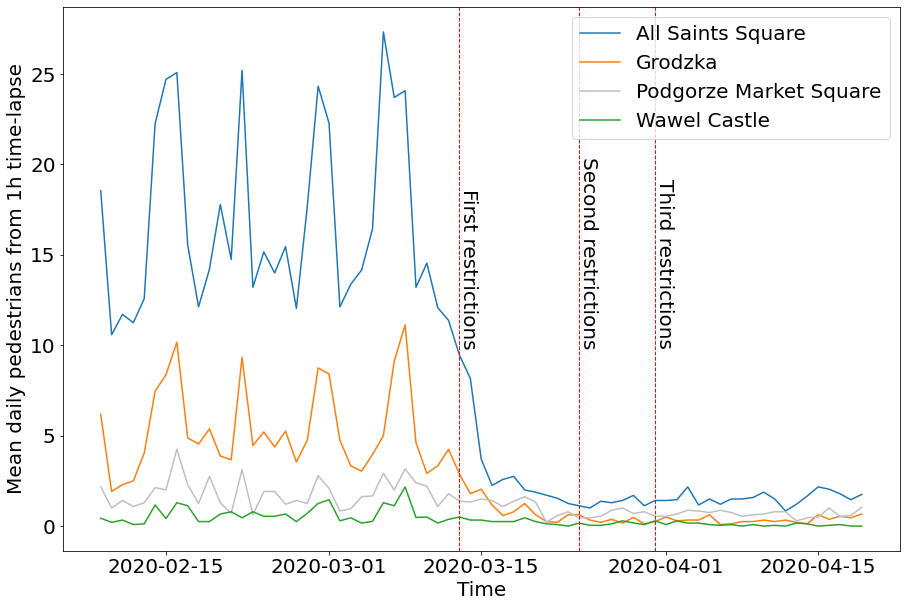

In [47]:
steps_back = 1700
fig, ax = plt.subplots()
t = df_allsaints.iloc[-steps_back:].resample('D', on='date')['person'].mean().reset_index()
plt.plot(t.date, t.person, label='All Saints Square');
t = df_grodzka.iloc[-steps_back:].resample('D', on='date')['person'].mean().reset_index()
plt.plot(t.date, t.person, label='Grodzka');
t = df_podgorze.iloc[-steps_back:].resample('D', on='date')['person'].mean().reset_index()
plt.plot(t.date, t.person, label='Podgorze Market Square', color='silver');
t = df_wawel.iloc[-steps_back:].resample('D', on='date')['person'].mean().reset_index()
plt.plot(t.date, t.person, label='Wawel Castle');
plot_key_dates()
plt.xlabel('Time')
plt.ylabel('Mean daily pedestrians from 1h time-lapse')
ax.legend()
plt.savefig('figure/pedestrian_activity_change.png');

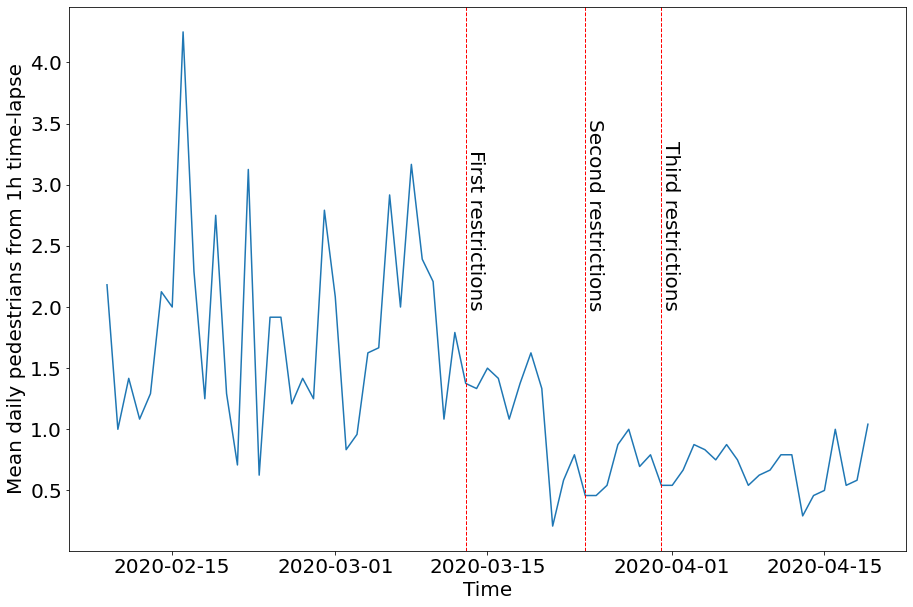

In [48]:
steps_back = 1700
fig, ax = plt.subplots()
t = df_podgorze.iloc[-steps_back:].resample('D', on='date')['person'].mean().reset_index()
plt.plot(t.date, t.person, label='Podgorze Market Square');
plot_key_dates(y=2)
plt.xlabel('Time')
plt.ylabel('Mean daily pedestrians from 1h time-lapse')
plt.savefig('figure/pedestrian_activity_change_podgorze.png');

## Weekly means

In [49]:
def plot_week(df):
    df_out = df.resample('W', on='date')['person'].mean().reset_index()
    plt.plot(df_out.date, df_out.person)
    
    return df_out

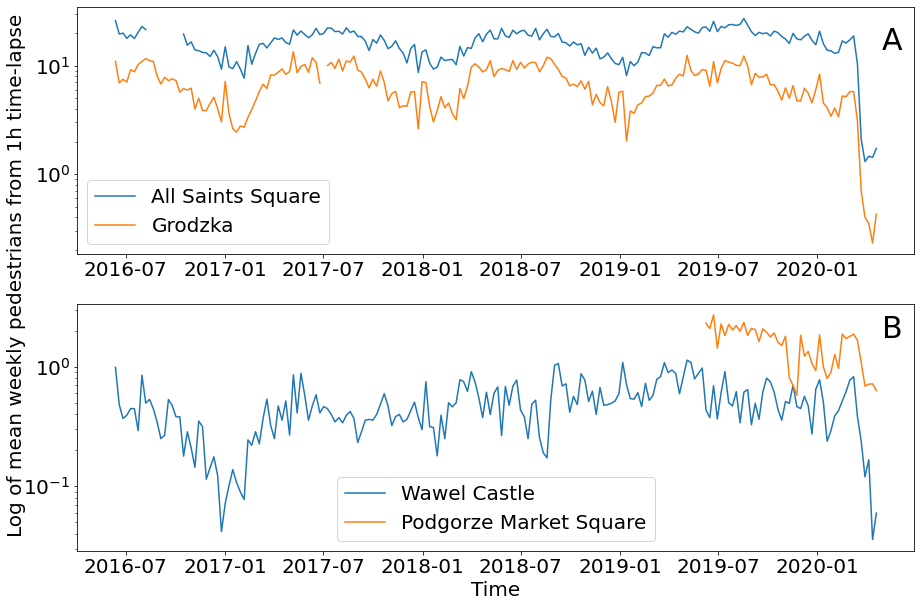

In [50]:
fig, (ax1, ax2) = plt.subplots(2)
df1w = df_allsaints_2.resample('W', on='date')['person'].mean().reset_index()
ax1.plot(df1w.date, df1w.person, label='All Saints Square')
df2w = df_grodzka_2.resample('W', on='date')['person'].mean().reset_index()
ax1.plot(df2w.date, df2w.person, label='Grodzka')
ax1.set_yscale('log')
ax1.legend()
df3w = df_wawel.resample('W', on='date')['person'].mean().reset_index()
ax2.plot(df3w.date, df3w.person, label='Wawel Castle')
df4w = df_podgorze_2.resample('W', on='date')['person'].mean().reset_index()
ax2.plot(df4w.date, df4w.person, label='Podgorze Market Square')
ax2.set_yscale('log')
ax2.legend()
plt.xlabel('Time')
fig.text(0.06, 0.15, 'Log of mean weekly pedestrians from 1h time-lapse', rotation='vertical')
fig.text(.87, .82, 'A', fontsize=30)
fig.text(.87, .42, 'B', fontsize=30)

plt.savefig('figure/pedestrian_activity_change_weekly.png');